# Candlestick Chart - Financial Price Movements

**Use Case**: Visualize stock prices, trading patterns, and financial market analysis

This notebook demonstrates how to create effective candlestick charts for analyzing financial data, price movements, and trading patterns.

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
from matplotlib.patches import Rectangle
from matplotlib.lines import Line2D
import warnings
warnings.filterwarnings('ignore')

# Set style for better-looking plots
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("Set2")

# Set random seed for reproducibility
np.random.seed(42)

print("Candlestick chart visualization libraries loaded!")

Candlestick chart visualization libraries loaded!


In [2]:
# Create sample financial datasets
# 1. Stock Price Data - Single Stock
dates = pd.date_range('2024-01-01', '2024-03-31', freq='D')
dates = dates[dates.weekday < 5]  # Remove weekends

# Simulate realistic stock price movements
initial_price = 100
volatility = 0.02
trend = 0.0005

stock_data = []
current_price = initial_price

for date in dates:
    # Calculate OHLC prices with realistic patterns
    daily_return = np.random.normal(trend, volatility)
    
    # Open price (with gap from previous close)
    gap = np.random.normal(0, 0.005)
    open_price = current_price * (1 + gap)
    
    # Generate intraday high and low
    intraday_volatility = abs(np.random.normal(0, 0.015))
    high_price = open_price * (1 + intraday_volatility)
    low_price = open_price * (1 - intraday_volatility)
    
    # Close price based on daily return
    close_price = open_price * (1 + daily_return)
    
    # Ensure OHLC logic is maintained
    high_price = max(high_price, open_price, close_price)
    low_price = min(low_price, open_price, close_price)
    
    # Volume (higher volume on bigger price moves)
    volume = int(np.random.exponential(1000000) * (1 + abs(daily_return) * 10))
    
    stock_data.append({
        'Date': date,
        'Open': round(open_price, 2),
        'High': round(high_price, 2),
        'Low': round(low_price, 2),
        'Close': round(close_price, 2),
        'Volume': volume
    })
    
    current_price = close_price

stock_df = pd.DataFrame(stock_data)

# 2. Multiple Stocks Comparison
stocks = ['AAPL', 'GOOGL', 'MSFT', 'TSLA']
multi_stock_data = []

for stock in stocks:
    base_price = np.random.uniform(80, 200)
    stock_volatility = np.random.uniform(0.015, 0.035)
    stock_trend = np.random.uniform(-0.001, 0.001)
    
    current_price = base_price
    
    for i, date in enumerate(dates[:30]):  # 30 days only for comparison
        daily_return = np.random.normal(stock_trend, stock_volatility)
        
        open_price = current_price * (1 + np.random.normal(0, 0.003))
        close_price = open_price * (1 + daily_return)
        
        intraday_vol = abs(np.random.normal(0, 0.01))
        high_price = max(open_price, close_price) * (1 + intraday_vol)
        low_price = min(open_price, close_price) * (1 - intraday_vol)
        
        volume = int(np.random.exponential(800000) * (1 + abs(daily_return) * 8))
        
        multi_stock_data.append({
            'Date': date,
            'Stock': stock,
            'Open': round(open_price, 2),
            'High': round(high_price, 2),
            'Low': round(low_price, 2),
            'Close': round(close_price, 2),
            'Volume': volume
        })
        
        current_price = close_price

multi_stock_df = pd.DataFrame(multi_stock_data)

# 3. Cryptocurrency Data (More Volatile)
crypto_data = []
crypto_price = 50000  # Starting at $50,000
crypto_volatility = 0.05  # Higher volatility

for date in dates[:60]:  # 60 days of crypto data
    daily_return = np.random.normal(0, crypto_volatility)
    
    # Crypto has more extreme gaps
    gap = np.random.normal(0, 0.02)
    open_price = crypto_price * (1 + gap)
    
    # Higher intraday movements
    intraday_vol = abs(np.random.normal(0, 0.03))
    high_price = open_price * (1 + intraday_vol)
    low_price = open_price * (1 - intraday_vol)
    
    close_price = open_price * (1 + daily_return)
    
    # Ensure OHLC logic
    high_price = max(high_price, open_price, close_price)
    low_price = min(low_price, open_price, close_price)
    
    # Crypto volume varies more extremely
    volume = int(np.random.exponential(500) * (1 + abs(daily_return) * 20))
    
    crypto_data.append({
        'Date': date,
        'Open': round(open_price, 2),
        'High': round(high_price, 2),
        'Low': round(low_price, 2),
        'Close': round(close_price, 2),
        'Volume': volume
    })
    
    crypto_price = close_price

crypto_df = pd.DataFrame(crypto_data)

# 4. Market Index Data (Less Volatile)
index_data = []
index_price = 4500  # S&P 500 level
index_volatility = 0.012  # Lower volatility

for date in dates:
    daily_return = np.random.normal(0.0003, index_volatility)  # Slight upward bias
    
    open_price = index_price * (1 + np.random.normal(0, 0.002))
    close_price = open_price * (1 + daily_return)
    
    intraday_vol = abs(np.random.normal(0, 0.008))
    high_price = max(open_price, close_price) * (1 + intraday_vol)
    low_price = min(open_price, close_price) * (1 - intraday_vol)
    
    volume = int(np.random.exponential(2000000))
    
    index_data.append({
        'Date': date,
        'Open': round(open_price, 2),
        'High': round(high_price, 2),
        'Low': round(low_price, 2),
        'Close': round(close_price, 2),
        'Volume': volume
    })
    
    index_price = close_price

index_df = pd.DataFrame(index_data)

print("Sample financial datasets created:")
print(f"Stock Data: {len(stock_df)} trading days")
print(f"Multi-Stock Data: {len(multi_stock_df)} records across 4 stocks")
print(f"Cryptocurrency Data: {len(crypto_df)} trading days")
print(f"Market Index Data: {len(index_df)} trading days")

# Display sample data
print(f"\nSample Stock Data:")
print(stock_df.head())


Sample financial datasets created:
Stock Data: 65 trading days
Multi-Stock Data: 120 records across 4 stocks
Cryptocurrency Data: 60 trading days
Market Index Data: 65 trading days

Sample Stock Data:
        Date    Open    High     Low   Close   Volume
0 2024-01-01   99.93  100.97   98.96  100.97   187324
1 2024-01-02  101.11  104.25   99.58  104.25  1612452
2 2024-01-03  104.53  105.25  103.60  103.60   395000
3 2024-01-04  102.25  103.70  100.79  101.34   374564
4 2024-01-05  101.50  102.89   99.50   99.50   729239


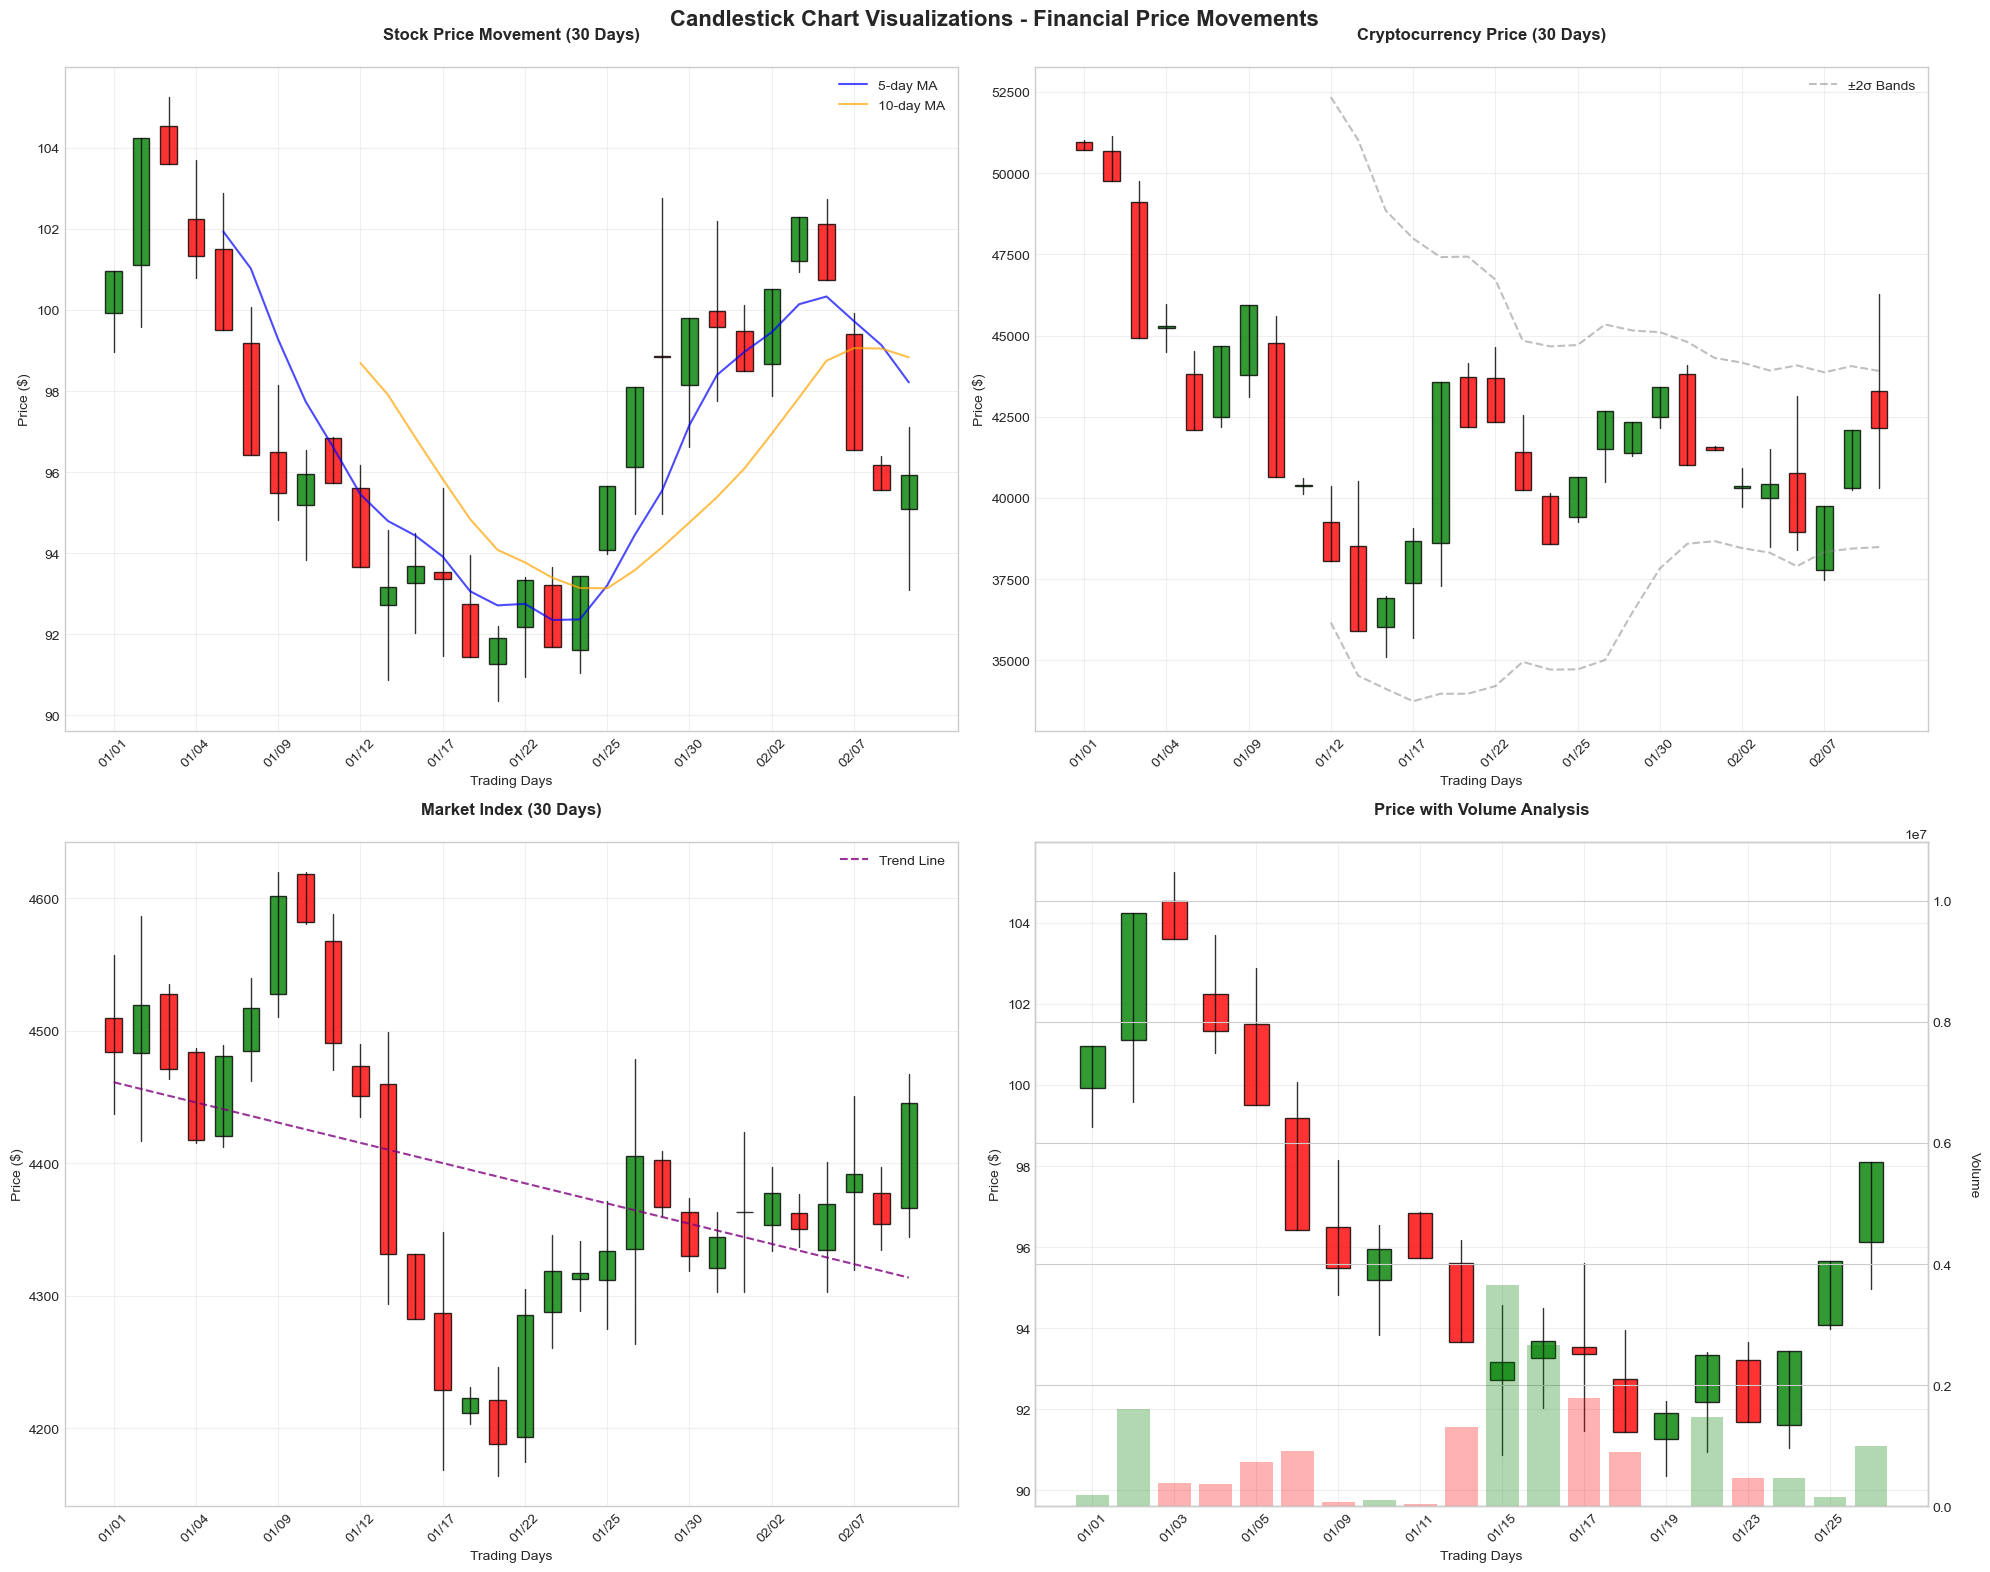

In [3]:
# Function to create candlestick charts with matplotlib
def create_candlestick_chart(df, title, ax, show_volume=False):
    """Create a candlestick chart using matplotlib"""
    
    # Determine bullish (green) and bearish (red) days
    bullish = df['Close'] >= df['Open']
    bearish = df['Close'] < df['Open']
    
    # Create x-axis positions
    x_pos = range(len(df))
    
    # Plot candlestick bodies
    for i in range(len(df)):
        # High-low lines (wicks)
        ax.plot([i, i], [df.iloc[i]['Low'], df.iloc[i]['High']], 
               color='black', linewidth=1, alpha=0.8)
        
        # Candlestick bodies
        open_price = df.iloc[i]['Open']
        close_price = df.iloc[i]['Close']
        
        if close_price >= open_price:  # Bullish candle
            color = 'green'
            bottom = open_price
            height = close_price - open_price
        else:  # Bearish candle
            color = 'red'
            bottom = close_price
            height = open_price - close_price
        
        # Draw rectangle for body
        rect = Rectangle((i-0.3, bottom), 0.6, height, 
                        facecolor=color, edgecolor='black', alpha=0.8)
        ax.add_patch(rect)
    
    # Formatting
    ax.set_title(title, fontweight='bold', pad=20)
    ax.set_xlabel('Trading Days')
    ax.set_ylabel('Price ($)')
    
    # Set x-axis labels (every 5th day)
    step = max(1, len(df) // 10)
    ax.set_xticks(range(0, len(df), step))
    ax.set_xticklabels([df.iloc[i]['Date'].strftime('%m/%d') for i in range(0, len(df), step)], 
                      rotation=45)
    
    ax.grid(True, alpha=0.3)
    
    return ax

# Create basic candlestick charts
fig, axes = plt.subplots(2, 2, figsize=(20, 16))
fig.suptitle('Candlestick Chart Visualizations - Financial Price Movements', fontsize=16, fontweight='bold')

# 1. Individual Stock Candlestick
ax1 = axes[0, 0]
create_candlestick_chart(stock_df.head(30), 'Stock Price Movement (30 Days)', ax1)

# Add moving averages
stock_30_day = stock_df.head(30).copy()
stock_30_day['MA5'] = stock_30_day['Close'].rolling(window=5).mean()
stock_30_day['MA10'] = stock_30_day['Close'].rolling(window=10).mean()

ax1.plot(range(len(stock_30_day)), stock_30_day['MA5'], label='5-day MA', color='blue', alpha=0.7)
ax1.plot(range(len(stock_30_day)), stock_30_day['MA10'], label='10-day MA', color='orange', alpha=0.7)
ax1.legend()

# 2. Crypto Candlestick (Higher Volatility)
ax2 = axes[0, 1]
create_candlestick_chart(crypto_df.head(30), 'Cryptocurrency Price (30 Days)', ax2)

# Add volatility bands
crypto_30_day = crypto_df.head(30).copy()
crypto_30_day['MA'] = crypto_30_day['Close'].rolling(window=10).mean()
crypto_30_day['Std'] = crypto_30_day['Close'].rolling(window=10).std()
crypto_30_day['Upper'] = crypto_30_day['MA'] + 2 * crypto_30_day['Std']
crypto_30_day['Lower'] = crypto_30_day['MA'] - 2 * crypto_30_day['Std']

ax2.plot(range(len(crypto_30_day)), crypto_30_day['Upper'], '--', color='gray', alpha=0.5, label='±2σ Bands')
ax2.plot(range(len(crypto_30_day)), crypto_30_day['Lower'], '--', color='gray', alpha=0.5)
ax2.legend()

# 3. Market Index (Lower Volatility)
ax3 = axes[1, 0]
create_candlestick_chart(index_df.head(30), 'Market Index (30 Days)', ax3)

# Add trend line
index_30_day = index_df.head(30).copy()
x_vals = np.arange(len(index_30_day))
z = np.polyfit(x_vals, index_30_day['Close'], 1)
p = np.poly1d(z)
ax3.plot(x_vals, p(x_vals), '--', color='purple', alpha=0.8, label=f'Trend Line')
ax3.legend()

# 4. Volume Analysis with Price
ax4 = axes[1, 1]

# Create subplot with volume
stock_subset = stock_df.head(20).copy()

# Price chart (top 2/3)
ax4_price = ax4
create_candlestick_chart(stock_subset, 'Price with Volume Analysis', ax4_price)

# Volume chart (bottom 1/3) - create twin axis
ax4_vol = ax4_price.twinx()
colors = ['green' if close >= open else 'red' 
          for close, open in zip(stock_subset['Close'], stock_subset['Open'])]

bars = ax4_vol.bar(range(len(stock_subset)), stock_subset['Volume'], 
                  color=colors, alpha=0.3, width=0.8)

ax4_vol.set_ylabel('Volume', rotation=270, labelpad=20)
ax4_vol.set_ylim(0, stock_subset['Volume'].max() * 3)  # Keep volume in bottom third

plt.tight_layout()
plt.show()


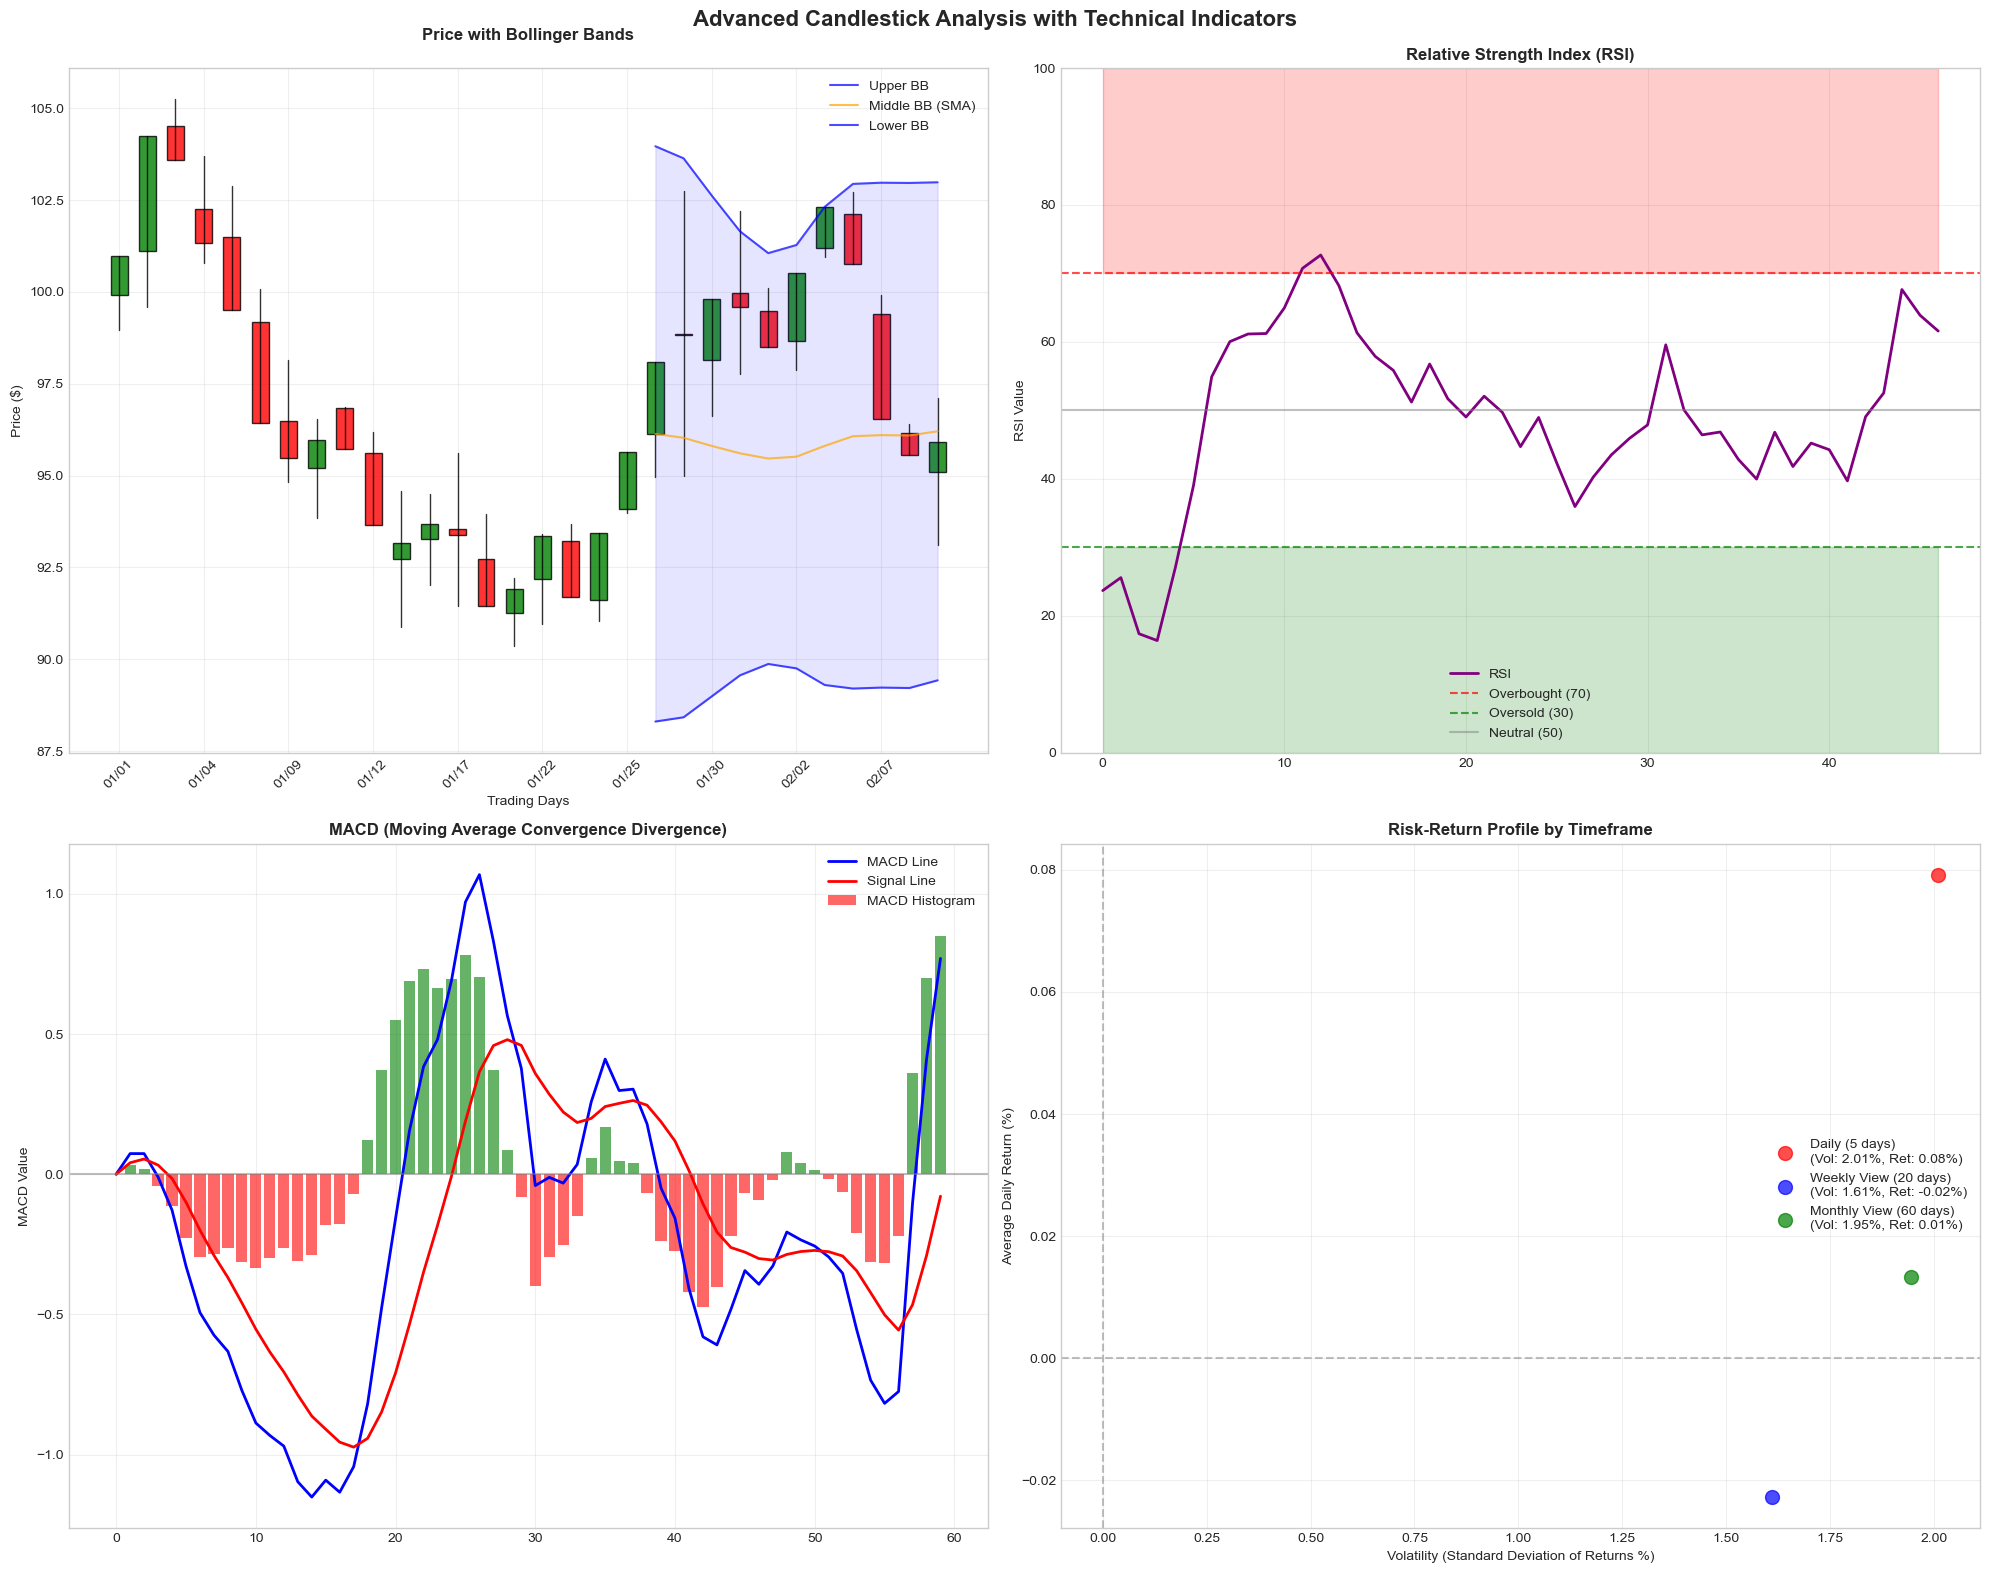

In [4]:
# Advanced candlestick techniques with technical indicators
fig, axes = plt.subplots(2, 2, figsize=(20, 16))
fig.suptitle('Advanced Candlestick Analysis with Technical Indicators', fontsize=16, fontweight='bold')

# Prepare data for advanced analysis
stock_analysis = stock_df.head(60).copy()

# Calculate technical indicators
def calculate_rsi(prices, period=14):
    """Calculate Relative Strength Index"""
    delta = prices.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

def calculate_bollinger_bands(prices, period=20, std_dev=2):
    """Calculate Bollinger Bands"""
    ma = prices.rolling(window=period).mean()
    std = prices.rolling(window=period).std()
    upper = ma + (std_dev * std)
    lower = ma - (std_dev * std)
    return upper, ma, lower

def calculate_macd(prices, fast=12, slow=26, signal=9):
    """Calculate MACD"""
    ema_fast = prices.ewm(span=fast).mean()
    ema_slow = prices.ewm(span=slow).mean()
    macd_line = ema_fast - ema_slow
    signal_line = macd_line.ewm(span=signal).mean()
    histogram = macd_line - signal_line
    return macd_line, signal_line, histogram

# Calculate indicators
stock_analysis['RSI'] = calculate_rsi(stock_analysis['Close'])
stock_analysis['BB_Upper'], stock_analysis['BB_Middle'], stock_analysis['BB_Lower'] = \
    calculate_bollinger_bands(stock_analysis['Close'])
stock_analysis['MACD'], stock_analysis['MACD_Signal'], stock_analysis['MACD_Hist'] = \
    calculate_macd(stock_analysis['Close'])

# 1. Candlestick with Bollinger Bands
ax1 = axes[0, 0]
create_candlestick_chart(stock_analysis.head(30), 'Price with Bollinger Bands', ax1)

# Add Bollinger Bands
bb_data = stock_analysis.head(30)
x_vals = range(len(bb_data))
ax1.plot(x_vals, bb_data['BB_Upper'], label='Upper BB', color='blue', alpha=0.7)
ax1.plot(x_vals, bb_data['BB_Middle'], label='Middle BB (SMA)', color='orange', alpha=0.7)
ax1.plot(x_vals, bb_data['BB_Lower'], label='Lower BB', color='blue', alpha=0.7)
ax1.fill_between(x_vals, bb_data['BB_Upper'], bb_data['BB_Lower'], alpha=0.1, color='blue')
ax1.legend()

# 2. RSI Analysis
ax2 = axes[0, 1]
rsi_data = stock_analysis['RSI'].dropna()
ax2.plot(range(len(rsi_data)), rsi_data, label='RSI', color='purple', linewidth=2)
ax2.axhline(y=70, color='red', linestyle='--', alpha=0.7, label='Overbought (70)')
ax2.axhline(y=30, color='green', linestyle='--', alpha=0.7, label='Oversold (30)')
ax2.axhline(y=50, color='gray', linestyle='-', alpha=0.5, label='Neutral (50)')
ax2.fill_between(range(len(rsi_data)), 70, 100, alpha=0.2, color='red')
ax2.fill_between(range(len(rsi_data)), 0, 30, alpha=0.2, color='green')
ax2.set_title('Relative Strength Index (RSI)', fontweight='bold')
ax2.set_ylabel('RSI Value')
ax2.set_ylim(0, 100)
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. MACD Analysis
ax3 = axes[1, 0]
macd_data = stock_analysis[['MACD', 'MACD_Signal', 'MACD_Hist']].dropna()
x_vals = range(len(macd_data))

ax3.plot(x_vals, macd_data['MACD'], label='MACD Line', color='blue', linewidth=2)
ax3.plot(x_vals, macd_data['MACD_Signal'], label='Signal Line', color='red', linewidth=2)

# MACD Histogram
colors = ['green' if x > 0 else 'red' for x in macd_data['MACD_Hist']]
ax3.bar(x_vals, macd_data['MACD_Hist'], color=colors, alpha=0.6, label='MACD Histogram')

ax3.axhline(y=0, color='gray', linestyle='-', alpha=0.5)
ax3.set_title('MACD (Moving Average Convergence Divergence)', fontweight='bold')
ax3.set_ylabel('MACD Value')
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4. Multi-timeframe Analysis
ax4 = axes[1, 1]

# Show different timeframes of the same stock
timeframes = {
    'Daily (5 days)': stock_df.head(5),
    'Weekly View (20 days)': stock_df.head(20),
    'Monthly View (60 days)': stock_df.head(60)
}

colors = ['red', 'blue', 'green']
for i, (tf_name, tf_data) in enumerate(timeframes.items()):
    # Calculate returns for comparison
    returns = ((tf_data['Close'] - tf_data['Open']) / tf_data['Open'] * 100)
    avg_return = returns.mean()
    volatility = returns.std()
    
    ax4.scatter(volatility, avg_return, s=100, color=colors[i], 
               label=f'{tf_name}\n(Vol: {volatility:.2f}%, Ret: {avg_return:.2f}%)', alpha=0.7)

ax4.set_xlabel('Volatility (Standard Deviation of Returns %)')
ax4.set_ylabel('Average Daily Return (%)')
ax4.set_title('Risk-Return Profile by Timeframe', fontweight='bold')
ax4.legend()
ax4.grid(True, alpha=0.3)
ax4.axhline(y=0, color='gray', linestyle='--', alpha=0.5)
ax4.axvline(x=0, color='gray', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


Candlestick Pattern Recognition:
STOCK PATTERNS DETECTED:
  2024-01-17: Doji (Close: $93.37)
  2024-01-24: Bullish Engulfing (Close: $93.44)
  2024-01-29: Doji (Close: $98.84)
  2024-01-30: Bullish Engulfing (Close: $99.80)
  2024-01-31: Doji (Close: $99.59)
  2024-02-14: Doji (Close: $96.51)
  2024-02-15: Bullish Engulfing (Close: $97.62)

CRYPTOCURRENCY PATTERNS DETECTED:
  2024-01-04: Doji (Close: $45,279.96)
  2024-01-31: Bearish Engulfing (Close: $41,007.07)
  2024-02-02: Doji (Close: $40,377.95)
  2024-02-06: Bearish Engulfing (Close: $38,945.53)
  2024-02-21: Bullish Engulfing (Close: $38,538.07)


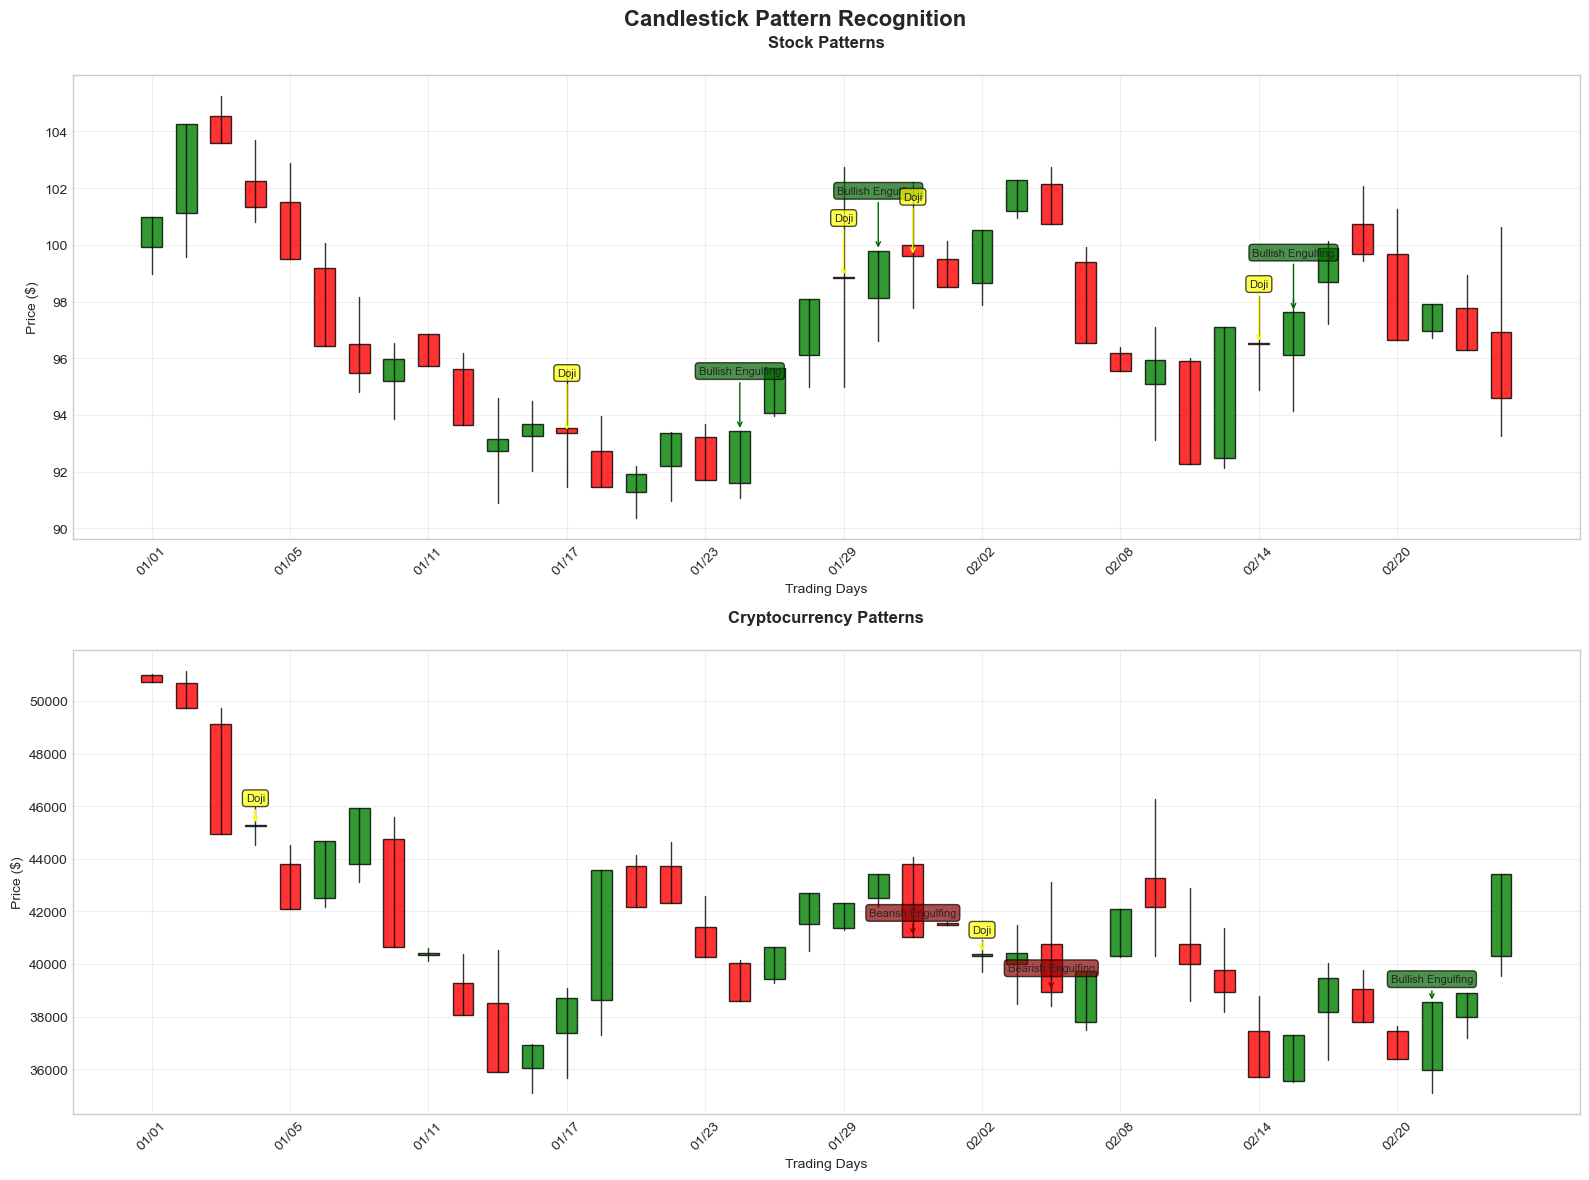

In [5]:
# Pattern recognition in candlestick charts
print("Candlestick Pattern Recognition:")
print("=" * 50)

def identify_patterns(df):
    """Identify common candlestick patterns"""
    patterns = []
    
    for i in range(1, len(df)):
        current = df.iloc[i]
        previous = df.iloc[i-1] if i > 0 else None
        
        # Calculate body and wick sizes
        body_size = abs(current['Close'] - current['Open'])
        total_range = current['High'] - current['Low']
        upper_wick = current['High'] - max(current['Open'], current['Close'])
        lower_wick = min(current['Open'], current['Close']) - current['Low']
        
        # Pattern identification
        pattern_found = None
        
        # Doji (small body relative to range)
        if body_size < total_range * 0.1:
            pattern_found = 'Doji'
        
        # Hammer (long lower wick, small body at top)
        elif (lower_wick > body_size * 2 and 
              upper_wick < body_size * 0.5 and
              current['Close'] > current['Open']):
            pattern_found = 'Hammer'
        
        # Shooting Star (long upper wick, small body at bottom)
        elif (upper_wick > body_size * 2 and 
              lower_wick < body_size * 0.5 and
              current['Close'] < current['Open']):
            pattern_found = 'Shooting Star'
        
        # Engulfing patterns (need previous candle)
        elif previous is not None:
            prev_body = abs(previous['Close'] - previous['Open'])
            
            # Bullish Engulfing
            if (current['Close'] > current['Open'] and  # Current is bullish
                previous['Close'] < previous['Open'] and  # Previous is bearish
                current['Open'] < previous['Close'] and   # Opens below previous close
                current['Close'] > previous['Open']):     # Closes above previous open
                pattern_found = 'Bullish Engulfing'
            
            # Bearish Engulfing
            elif (current['Close'] < current['Open'] and  # Current is bearish
                  previous['Close'] > previous['Open'] and  # Previous is bullish
                  current['Open'] > previous['Close'] and   # Opens above previous close
                  current['Close'] < previous['Open']):     # Closes below previous open
                pattern_found = 'Bearish Engulfing'
        
        if pattern_found:
            patterns.append({
                'Date': current['Date'],
                'Pattern': pattern_found,
                'Close': current['Close'],
                'Body_Size': body_size,
                'Total_Range': total_range
            })
    
    return patterns

# Analyze patterns in stock data
stock_patterns = identify_patterns(stock_df.head(40))
crypto_patterns = identify_patterns(crypto_df.head(40))

print("STOCK PATTERNS DETECTED:")
for pattern in stock_patterns:
    print(f"  {pattern['Date'].strftime('%Y-%m-%d')}: {pattern['Pattern']} (Close: ${pattern['Close']:.2f})")

print(f"\nCRYPTOCURRENCY PATTERNS DETECTED:")
for pattern in crypto_patterns:
    print(f"  {pattern['Date'].strftime('%Y-%m-%d')}: {pattern['Pattern']} (Close: ${pattern['Close']:,.2f})")

# Create pattern visualization
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 12))
fig.suptitle('Candlestick Pattern Recognition', fontsize=16, fontweight='bold')

# Stock patterns visualization
ax1 = create_candlestick_chart(stock_df.head(40), 'Stock Patterns', ax1)

# Highlight patterns
pattern_colors = {
    'Doji': 'yellow',
    'Hammer': 'green',
    'Shooting Star': 'red',
    'Bullish Engulfing': 'darkgreen',
    'Bearish Engulfing': 'darkred'
}

for i, pattern in enumerate(stock_patterns):
    # Find the index of this date in the dataframe
    date_idx = stock_df[stock_df['Date'] == pattern['Date']].index[0]
    if date_idx < 40:  # Only show if within our chart range
        ax1.annotate(pattern['Pattern'], 
                    xy=(date_idx, pattern['Close']), 
                    xytext=(date_idx, pattern['Close'] + 2),
                    arrowprops=dict(arrowstyle='->', color=pattern_colors.get(pattern['Pattern'], 'blue')),
                    fontsize=8, ha='center',
                    bbox=dict(boxstyle='round,pad=0.3', facecolor=pattern_colors.get(pattern['Pattern'], 'blue'), alpha=0.7))

# Crypto patterns visualization
ax2 = create_candlestick_chart(crypto_df.head(40), 'Cryptocurrency Patterns', ax2)

for i, pattern in enumerate(crypto_patterns):
    date_idx = crypto_df[crypto_df['Date'] == pattern['Date']].index[0]
    if date_idx < 40:
        ax2.annotate(pattern['Pattern'], 
                    xy=(date_idx, pattern['Close']), 
                    xytext=(date_idx, pattern['Close'] + pattern['Close'] * 0.02),
                    arrowprops=dict(arrowstyle='->', color=pattern_colors.get(pattern['Pattern'], 'blue')),
                    fontsize=8, ha='center',
                    bbox=dict(boxstyle='round,pad=0.3', facecolor=pattern_colors.get(pattern['Pattern'], 'blue'), alpha=0.7))

plt.tight_layout()
plt.show()


In [6]:
# Interactive candlestick charts (Plotly structure)
print("Interactive Candlestick Charts (Plotly):")
print("=" * 50)

print("\n1. Basic Interactive Candlestick")
print("Code structure:")
print("""
fig = go.Figure(data=go.Candlestick(
    x=stock_df['Date'],
    open=stock_df['Open'],
    high=stock_df['High'],
    low=stock_df['Low'],
    close=stock_df['Close'],
    name='Stock Price'
))

fig.update_layout(
    title='Interactive Stock Price Chart',
    yaxis_title='Price ($)',
    xaxis_title='Date',
    xaxis_rangeslider_visible=False
)

fig.show()
""")

print("\n2. Candlestick with Volume and Technical Indicators")
print("Code structure:")
print("""
# Create subplots
fig = make_subplots(
    rows=3, cols=1,
    shared_xaxes=True,
    vertical_spacing=0.03,
    row_width=[0.2, 0.7, 0.1],
    subplot_titles=('Price', 'Volume', 'RSI')
)

# Add candlestick
fig.add_trace(go.Candlestick(
    x=df['Date'],
    open=df['Open'], high=df['High'],
    low=df['Low'], close=df['Close'],
    name='Price'
), row=1, col=1)

# Add Bollinger Bands
fig.add_trace(go.Scatter(
    x=df['Date'], y=df['BB_Upper'],
    fill=None, mode='lines',
    line_color='rgba(0,100,80,0)',
    showlegend=False
), row=1, col=1)

fig.add_trace(go.Scatter(
    x=df['Date'], y=df['BB_Lower'],
    fill='tonexty',
    fillcolor='rgba(0,100,80,0.2)',
    line_color='rgba(0,100,80,0)',
    name='Bollinger Bands'
), row=1, col=1)

# Add volume
fig.add_trace(go.Bar(
    x=df['Date'], y=df['Volume'],
    name='Volume'
), row=2, col=1)

# Add RSI
fig.add_trace(go.Scatter(
    x=df['Date'], y=df['RSI'],
    name='RSI'
), row=3, col=1)

fig.show()
""")

print("\n3. Multi-Stock Comparison")
print("Code structure:")
print("""
fig = go.Figure()

for stock in stocks:
    stock_data = df[df['Stock'] == stock]
    
    fig.add_trace(go.Candlestick(
        x=stock_data['Date'],
        open=stock_data['Open'],
        high=stock_data['High'],
        low=stock_data['Low'],
        close=stock_data['Close'],
        name=stock,
        visible=True if stock == stocks[0] else 'legendonly'
    ))

# Add dropdown menu for stock selection
fig.update_layout(
    updatemenus=[
        dict(
            buttons=list([
                dict(label=stock,
                     method="update",
                     args=[{"visible": [s == stock for s in stocks]}])
                for stock in stocks
            ])
        )
    ]
)

fig.show()
""")


Interactive Candlestick Charts (Plotly):

1. Basic Interactive Candlestick
Code structure:

fig = go.Figure(data=go.Candlestick(
    x=stock_df['Date'],
    open=stock_df['Open'],
    high=stock_df['High'],
    low=stock_df['Low'],
    close=stock_df['Close'],
    name='Stock Price'
))

fig.update_layout(
    title='Interactive Stock Price Chart',
    yaxis_title='Price ($)',
    xaxis_title='Date',
    xaxis_rangeslider_visible=False
)

fig.show()


2. Candlestick with Volume and Technical Indicators
Code structure:

# Create subplots
fig = make_subplots(
    rows=3, cols=1,
    shared_xaxes=True,
    vertical_spacing=0.03,
    row_width=[0.2, 0.7, 0.1],
    subplot_titles=('Price', 'Volume', 'RSI')
)

# Add candlestick
fig.add_trace(go.Candlestick(
    x=df['Date'],
    open=df['Open'], high=df['High'],
    low=df['Low'], close=df['Close'],
    name='Price'
), row=1, col=1)

# Add Bollinger Bands
fig.add_trace(go.Scatter(
    x=df['Date'], y=df['BB_Upper'],
    fill=None, mode='lines

In [7]:
# Statistical analysis of candlestick data
print("Candlestick Chart Statistical Analysis:")
print("=" * 50)

# 1. Price Movement Analysis
print("1. PRICE MOVEMENT STATISTICS:")

def analyze_price_movements(df, name):
    """Analyze price movement statistics"""
    
    # Calculate daily returns
    df['Daily_Return'] = (df['Close'] - df['Open']) / df['Open'] * 100
    df['High_Low_Range'] = ((df['High'] - df['Low']) / df['Open']) * 100
    df['Body_Size'] = abs((df['Close'] - df['Open']) / df['Open']) * 100
    
    # Identify candle types
    df['Candle_Type'] = df.apply(lambda row: 'Bullish' if row['Close'] >= row['Open'] else 'Bearish', axis=1)
    
    print(f"\n   {name} Analysis:")
    print(f"     Total Trading Days: {len(df)}")
    print(f"     Bullish Days: {len(df[df['Candle_Type'] == 'Bullish'])} ({len(df[df['Candle_Type'] == 'Bullish'])/len(df)*100:.1f}%)")
    print(f"     Bearish Days: {len(df[df['Candle_Type'] == 'Bearish'])} ({len(df[df['Candle_Type'] == 'Bearish'])/len(df)*100:.1f}%)")
    
    # Return statistics
    avg_return = df['Daily_Return'].mean()
    return_std = df['Daily_Return'].std()
    max_gain = df['Daily_Return'].max()
    max_loss = df['Daily_Return'].min()
    
    print(f"     Average Daily Return: {avg_return:+.3f}%")
    print(f"     Return Volatility: {return_std:.3f}%")
    print(f"     Maximum Single-Day Gain: {max_gain:+.2f}%")
    print(f"     Maximum Single-Day Loss: {max_loss:+.2f}%")
    
    # Range analysis
    avg_range = df['High_Low_Range'].mean()
    avg_body = df['Body_Size'].mean()
    
    print(f"     Average Daily Range: {avg_range:.2f}%")
    print(f"     Average Body Size: {avg_body:.2f}%")
    print(f"     Range/Body Ratio: {avg_range/avg_body:.2f} (higher = more wicks)")
    
    # Volatility clustering
    df['High_Vol_Day'] = df['High_Low_Range'] > df['High_Low_Range'].quantile(0.75)
    consecutive_high_vol = 0
    max_consecutive = 0
    
    for high_vol in df['High_Vol_Day']:
        if high_vol:
            consecutive_high_vol += 1
            max_consecutive = max(max_consecutive, consecutive_high_vol)
        else:
            consecutive_high_vol = 0
    
    print(f"     High Volatility Days (>75th percentile): {df['High_Vol_Day'].sum()}")
    print(f"     Max Consecutive High-Vol Days: {max_consecutive}")
    
    return df

# Analyze different datasets
stock_analysis = analyze_price_movements(stock_df.copy(), "Individual Stock")
crypto_analysis = analyze_price_movements(crypto_df.copy(), "Cryptocurrency")
index_analysis = analyze_price_movements(index_df.copy(), "Market Index")

# 2. Pattern Frequency Analysis
print(f"\n2. CANDLESTICK PATTERN FREQUENCY:")

all_patterns = {
    'Stock': stock_patterns,
    'Crypto': crypto_patterns
}

for asset_type, patterns in all_patterns.items():
    print(f"\n   {asset_type} Patterns:")
    if patterns:
        pattern_counts = {}
        for pattern in patterns:
            pattern_type = pattern['Pattern']
            pattern_counts[pattern_type] = pattern_counts.get(pattern_type, 0) + 1
        
        total_patterns = len(patterns)
        for pattern_type, count in pattern_counts.items():
            frequency = (count / total_patterns) * 100
            print(f"     {pattern_type}: {count} occurrences ({frequency:.1f}%)")
    else:
        print(f"     No patterns detected in sample period")

# 3. Technical Indicator Performance
print(f"\n3. TECHNICAL INDICATOR ANALYSIS:")

# RSI Analysis
stock_with_indicators = stock_analysis.copy()
stock_with_indicators['RSI'] = calculate_rsi(stock_with_indicators['Close'])

# Remove NaN values
indicator_data = stock_with_indicators.dropna()

# RSI overbought/oversold analysis
overbought_days = len(indicator_data[indicator_data['RSI'] > 70])
oversold_days = len(indicator_data[indicator_data['RSI'] < 30])
neutral_days = len(indicator_data[(indicator_data['RSI'] >= 30) & (indicator_data['RSI'] <= 70)])

print(f"   RSI Analysis:")
print(f"     Overbought Days (RSI > 70): {overbought_days} ({overbought_days/len(indicator_data)*100:.1f}%)")
print(f"     Oversold Days (RSI < 30): {oversold_days} ({oversold_days/len(indicator_data)*100:.1f}%)")
print(f"     Neutral Days (30-70): {neutral_days} ({neutral_days/len(indicator_data)*100:.1f}%)")

# Bollinger Band analysis
bb_upper, bb_middle, bb_lower = calculate_bollinger_bands(indicator_data['Close'])
indicator_data['BB_Upper'] = bb_upper
indicator_data['BB_Lower'] = bb_lower

above_upper_band = len(indicator_data[indicator_data['Close'] > indicator_data['BB_Upper']])
below_lower_band = len(indicator_data[indicator_data['Close'] < indicator_data['BB_Lower']])

print(f"\n   Bollinger Bands Analysis:")
print(f"     Price Above Upper Band: {above_upper_band} days ({above_upper_band/len(indicator_data)*100:.1f}%)")
print(f"     Price Below Lower Band: {below_lower_band} days ({below_lower_band/len(indicator_data)*100:.1f}%)")

# MACD signals
macd_line, signal_line, histogram = calculate_macd(indicator_data['Close'])
indicator_data['MACD'] = macd_line
indicator_data['MACD_Signal'] = signal_line

# MACD crossovers
bullish_crossovers = 0
bearish_crossovers = 0

for i in range(1, len(indicator_data)):
    prev_macd = indicator_data['MACD'].iloc[i-1]
    prev_signal = indicator_data['MACD_Signal'].iloc[i-1]
    curr_macd = indicator_data['MACD'].iloc[i]
    curr_signal = indicator_data['MACD_Signal'].iloc[i]
    
    # Bullish crossover: MACD crosses above signal
    if prev_macd <= prev_signal and curr_macd > curr_signal:
        bullish_crossovers += 1
    # Bearish crossover: MACD crosses below signal
    elif prev_macd >= prev_signal and curr_macd < curr_signal:
        bearish_crossovers += 1

print(f"\n   MACD Analysis:")
print(f"     Bullish Crossovers: {bullish_crossovers}")
print(f"     Bearish Crossovers: {bearish_crossovers}")

# 4. Risk Metrics
print(f"\n4. RISK METRICS COMPARISON:")

datasets = {
    'Individual Stock': stock_analysis,
    'Cryptocurrency': crypto_analysis,
    'Market Index': index_analysis
}

for name, df in datasets.items():
    # Calculate risk metrics
    returns = df['Daily_Return'].dropna()
    
    # Value at Risk (95% confidence)
    var_95 = returns.quantile(0.05)
    
    # Maximum Drawdown
    cumulative_returns = (1 + returns/100).cumprod()
    rolling_max = cumulative_returns.expanding().max()
    drawdown = (cumulative_returns - rolling_max) / rolling_max
    max_drawdown = drawdown.min() * 100
    
    # Sharpe Ratio (assuming 2% risk-free rate)
    risk_free_rate = 2.0 / 365  # Daily risk-free rate
    excess_returns = returns - risk_free_rate
    sharpe_ratio = excess_returns.mean() / excess_returns.std() * np.sqrt(252)  # Annualized
    
    # Sortino Ratio (downside risk only)
    downside_returns = returns[returns < 0]
    downside_std = downside_returns.std()
    sortino_ratio = excess_returns.mean() / downside_std * np.sqrt(252) if len(downside_returns) > 0 else np.nan
    
    print(f"\n   {name}:")
    print(f"     Value at Risk (95%): {var_95:.2f}%")
    print(f"     Maximum Drawdown: {max_drawdown:.2f}%")
    print(f"     Sharpe Ratio: {sharpe_ratio:.3f}")
    print(f"     Sortino Ratio: {sortino_ratio:.3f}")

# 5. Trading Strategy Performance (Simple MA Crossover)
print(f"\n5. SIMPLE TRADING STRATEGY ANALYSIS:")

def backtest_ma_strategy(df, fast_ma=5, slow_ma=20):
    """Simple moving average crossover strategy"""
    df = df.copy()
    df['MA_Fast'] = df['Close'].rolling(window=fast_ma).mean()
    df['MA_Slow'] = df['Close'].rolling(window=slow_ma).mean()
    
    # Generate signals
    df['Signal'] = 0
    df.loc[df['MA_Fast'] > df['MA_Slow'], 'Signal'] = 1  # Buy signal
    df.loc[df['MA_Fast'] <= df['MA_Slow'], 'Signal'] = -1  # Sell signal
    
    # Calculate strategy returns
    df['Position'] = df['Signal'].shift(1)  # Use previous day's signal
    df['Strategy_Return'] = df['Position'] * df['Daily_Return']
    
    # Performance metrics
    total_return = df['Strategy_Return'].sum()
    win_rate = len(df[df['Strategy_Return'] > 0]) / len(df[df['Strategy_Return'] != 0]) * 100
    
    return total_return, win_rate, df

# Test strategy on stock data
strategy_return, win_rate, strategy_df = backtest_ma_strategy(stock_analysis)

print(f"   Moving Average Crossover Strategy (5/20 MA):")
print(f"     Total Return: {strategy_return:.2f}%")
print(f"     Win Rate: {win_rate:.1f}%")
print(f"     Buy and Hold Return: {stock_analysis['Daily_Return'].sum():.2f}%")

# 6. Candlestick Chart Design Guidelines
print(f"\n6. CANDLESTICK CHART BEST PRACTICES:")

print(f"   Color Conventions:")
print(f"   ✓ Green/White candles for bullish (Close > Open)")
print(f"   ✓ Red/Black candles for bearish (Close < Open)")
print(f"   ✓ Consistent color scheme across all charts")

print(f"\n   Technical Requirements:")
print(f"   ✓ OHLC data integrity (High ≥ max(Open,Close), Low ≤ min(Open,Close))")
print(f"   ✓ Appropriate time scaling (daily, weekly, hourly)")
print(f"   ✓ Volume integration when relevant")

print(f"\n   Visual Design:")
print(f"   ✓ Adequate spacing between candles")
print(f"   ✓ Clear wick/shadow representation")
print(f"   ✓ Readable price scale")
print(f"   ✓ Pattern highlighting when needed")

print(f"\n   When to Use Candlestick Charts:")
print("   • Financial market analysis")
print("   • Price trend identification")
print("   • Pattern recognition trading")
print("   • Volatility assessment")
print("   • Multi-timeframe analysis")
print("   • Technical indicator integration")

print(f"\nAlternatives to Consider:")
print("   • Line charts for simple price trends")
print("   • Bar charts for OHLC without pattern emphasis")
print("   • Area charts for volume-weighted prices")
print("   • Heikin-Ashi charts for smoother trends")


Candlestick Chart Statistical Analysis:
1. PRICE MOVEMENT STATISTICS:

   Individual Stock Analysis:
     Total Trading Days: 65
     Bullish Days: 30 (46.2%)
     Bearish Days: 35 (53.8%)
     Average Daily Return: -0.034%
     Return Volatility: 1.976%
     Maximum Single-Day Gain: +7.75%
     Maximum Single-Day Loss: -4.00%
     Average Daily Range: 3.07%
     Average Body Size: 1.51%
     Range/Body Ratio: 2.04 (higher = more wicks)
     High Volatility Days (>75th percentile): 16
     Max Consecutive High-Vol Days: 2

   Cryptocurrency Analysis:
     Total Trading Days: 60
     Bullish Days: 29 (48.3%)
     Bearish Days: 31 (51.7%)
     Average Daily Return: +0.052%
     Return Volatility: 4.340%
     Maximum Single-Day Gain: +12.80%
     Maximum Single-Day Loss: -9.20%
     Average Daily Range: 6.10%
     Average Body Size: 3.54%
     Range/Body Ratio: 1.72 (higher = more wicks)
     High Volatility Days (>75th percentile): 15
     Max Consecutive High-Vol Days: 2

   Market Inde